# Лабораторная работа 2

# Сычева Дарья, группа РИМ-181226
### Раздел курса на stepik - 3. Коррекция яркости и цвета

### 3.1. Автоконтраст черно-белого изображения

#### Прочитайте изображение из файла img.png. Примените к нему линейное выравнивание яркости: примените к каждому пикселю функцию

#### После вычисления функции значения изображения окажутся вещественными. Чтобы привести их к целым числам, используйте метод img.astype('uint8'), который возвращает изображение в целых числах. Результат сохраните в файл out_img.png.

In [1]:
from skimage.io import imread, imshow
from skimage import img_as_float, img_as_ubyte
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

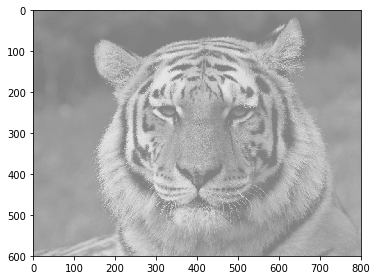

In [2]:
img = imread("https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png")
img2 = imread("https://stepik.org/media/attachments/lesson/58402/tiger-high-contrast.png")
imshow(img)
plt.show()

In [5]:
def autocntr(img):
    Xmin = min(img.ravel())
    Xmax = max(img.ravel())
    k = 255/(Xmax-Xmin)
    img = ((img-Xmin)*k).astype('uint8')
    return img

True

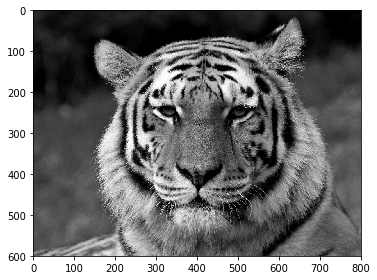

In [6]:
img = autocntr(img)
imshow(img)
np.array_equal(img, img2)

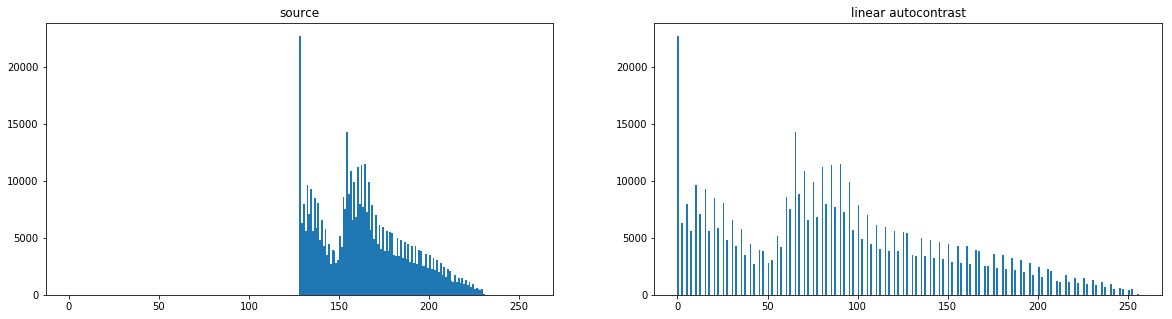

In [11]:
img = imread("https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png")

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title("source")
plt.hist(img.ravel(), bins=range(257))

plt.subplot(1,2,2)
plt.title("linear autocontrast")
plt.hist(autocontrast(img).ravel(), bins=range(257))

plt.show()

#### 3.1.2. Подсчет минимума и максимума устойчивого автоконтраста

#### Прочитайте изображение из файла img.png. Подсчитайте минимум и максимум яркости для стабильного автоконтраста этого изображения. Необходимо отбросить 5% самых светлых и 5% самых темных пикселей. Для получения числа отбрасываемых пикселей используйте формулу. Два посчитанных числа (минимум и максимум) выведите на стандартный вывод через пробел.

In [14]:
def min_max(img):
    imgs = np.sort(img.ravel())
    trash = int(imgs.shape[0] *0.05)
    imgs = imgs[trash: imgs.shape[0]-trash]
    maximum = imgs[0]
    minimum = imgs[imgs.shape[0]-1]
    return maximum, minimum

In [15]:
img = imread("https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png")
min_max(img)

(129, 208)

#### 3.1.3. Устойчивый автоконтраст черно-белого изображения

#### Прочитайте изображение из файла img.png. Примените к нему линейное выравнивание яркости: примените к каждому пикселю функцию. Для вычисления максимума и минимума отбрасывайте по 5% самых светлых и самых темных пикселей (как в предыдущем задании). Перед вычислениями приведите изображение в вещественные числа (img.astype('float')), иначе может возникнуть переполнение (т.к. значения некоторых пикселей мы игнорируем при подсчете минимума и максимума). После растяжения яркости обрежьте значения изображения от 0 до 255 с помощью функции numpy.clip. После вычисления функции значения изображения окажутся вещественными. Чтобы привести их к целым числам, используйте метод img.astype('uint8'), который возвращает изображение в целых числах. Результат сохраните в файл out_img.png.



In [16]:
img = imread("https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png")
img2 = imread("https://stepik.org/media/attachments/lesson/58402/tiger-stable-contrast.png")

In [17]:
def autocntr_func(img):
    maximum, minimum = top_lightest_darkest(img)
    img = img.astype('float')

    img = (img - maximum) * 255/(minimum - maximum)
    img = np.clip(img, 0, 255)
    img = img.astype('uint8')
    return img

True

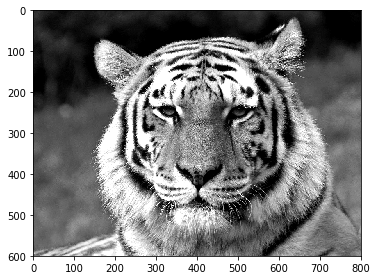

In [18]:
img = autocntr_func(img)

imshow(img)
np.array_equal(img, img2)

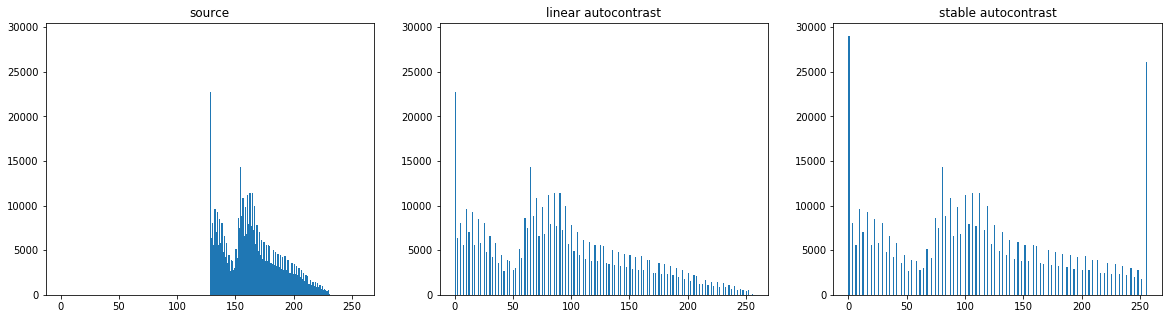

In [21]:
img = imread("https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png")

plt.figure(figsize=(20,5))

ax1 = plt.subplot(1,3,1)
plt.title("source")
plt.hist(img.ravel(), bins=range(257))

ax2 = plt.subplot(1,3,2, sharey = ax1)
plt.title("linear autocontrast")
plt.hist(autocontrast(img).ravel(), bins=range(257))

ax3 = plt.subplot(1,3,3, sharey = ax1)
plt.title("stable autocontrast")
plt.hist(autocntr_func(img).ravel(), bins=range(257))
plt.show()

### 3.2 Коррекция контраста цветного изображения
#### Устойчивый цветной автоконтраст

#### Прочитайте цветное изображение из файла img.png. Примените к нему устойчивый автоконтраст. Для этого:
#### 1. Переведите изображение в вещественные числа от 0 до 1.
#### 2. Переведите изображение в пространство YUV по формулам.
#### 3. Найдите максимум и минимум для устойчивого автоконтраста с отбрасыванием 5% самых светлых и 5% самых темных пикселей.
#### 4. Примените линейное растяжение канала Y по формуле
#### 5. Обрежьте значения канала Y от 0 до 1.
#### 6. Переведите изображение в пространство RGB по формулам:
#### 7. Обрежьте значения изображения от 0 до 1.
#### 8. Переведите изображение в целые числа от 0 до 255.
#### Результат сохраните в файл out_img.png.

In [25]:
img = imread("https://stepik.org/media/attachments/lesson/60609/tiger-color.png")
img2 = imread("https://stepik.org/media/attachments/lesson/60609/tiger-stable-contrast.png")

In [26]:
def autocntr_clr_func(img):
    
    img_f = img_as_float(img) #1
   

    R = img_f[:,:,0]
    G = img_f[:,:,1]
    B = img_f[:,:,2]

    Y =  0.2126* R + 0.7152* G + 0.0722* B
    U = -0.0999* R - 0.3360* G + 0.4360* B
    V =  0.6150* R - 0.5586* G - 0.0563* B
    
    left, right = min_max(Y) #2
    
    Y = np.clip((Y - left)/(right - left), 0 , 1) #4-5

    R = np.clip(Y + 1.2803*V, 0 , 1)
    G = np.clip(Y - 0.2148*U - 0.3805*V, 0 , 1)
    B = np.clip(Y + 2.1279*U, 0 , 1) #6-7

    img = img_as_ubyte(np.dstack((R , G, B))) #8
    return img

C:\Users\DSycheva\Anacondaa\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


True

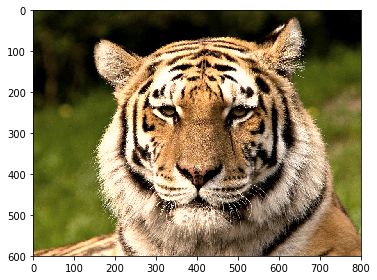

In [27]:
img = autocntr_clr_func(img)
imshow(img)
np.array_equal(img, img2)

### 3.3. Баланс белого. Модель «серого мира»
#### 3.3.1. Преобразование серого мира
#### Прочитайте изображение из файла img.png. Примените к нему преобразование серого мира. Для этого:

#### 1. Сконвертируйте изображение в вещественные числа.
#### 2. Подсчитайте коэффициенты 𝑟𝑤,𝑔𝑤,𝑏𝑤 как описано в видео.
#### 3. Поделите каналы изображения на коэффициенты.
#### 4. Обрежьте значения пикселей, чтобы они не выходили из допустимого диапазона ([0; 255] или [0;1]).

In [28]:
img = imread("https://stepik.org/media/attachments/lesson/60610/railroad.png")
img2 = imread("https://stepik.org/media/attachments/lesson/60610/railroad-gray-world.png")

In [29]:
def grey_world(img):

    #1. Сконвертируйте изображение в вещественные числа.
    img = img_as_float(img)

    R = img[:,:, 0]
    G = img[:,:, 1]
    B = img[:,:, 2]

    #2. Подсчитайте коэффициенты 𝑟𝑤,𝑔𝑤,𝑏𝑤
    avg = (R.mean() + G.mean() + B.mean())/3
    rw = R.mean()/avg
    gw = G.mean()/avg
    bw = B.mean()/avg

    #3. Поделите каналы изображения на коэффициенты.
    #4. Обрежьте значения пикселей, чтобы 
    #они не выходили из допустимого диапазона ([0; 255] или [0;1]).
    R = np.clip(R/rw, 0, 1)
    G = np.clip(G/gw, 0, 1)
    B = np.clip(B/bw, 0, 1)

    img = img_as_ubyte(np.dstack((R , G, B)))
    
    return img

In [30]:
img = grey_world(img)
np.array_equal(img, img2)

C:\Users\DSycheva\Anacondaa\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


True

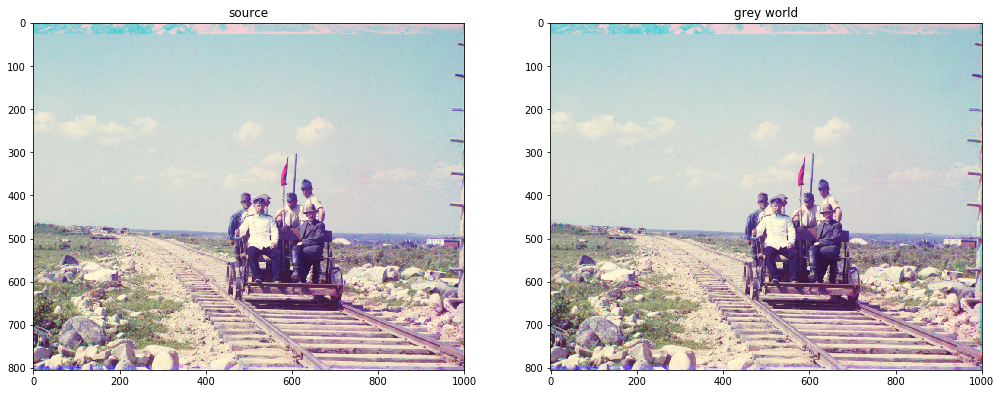

In [32]:
plt.figure(figsize=(17,8))

plt.subplot(1,2,1)
plt.title("source")
plt.imshow(img)

plt.subplot(1,2,2)
plt.title("grey world")
plt.imshow(img2)
plt.show()

### 3.4. Выравнивание гистограммы
#### 3.4.1. Выравнивание гистограммы
#### Прочитайте изображение из файла img.png. Примените к нему выравнивание гистограммы по алгоритму, описанному в слайдах и видео. Работать достаточно в целых числах, помещающихся в байт (т.е. изображение конвертировать не нужно).

In [33]:
img = imread('https://stepik.org/media/attachments/lesson/60611/landscape.png')
img2 = imread('https://stepik.org/media/attachments/lesson/60611/landscape-histeq.png')

In [34]:
def hist_equal(img):

    h = np.histogram(img, bins=range(257))[0]
    cdf = np.cumsum(h)

    cdf_min = cdf[cdf.nonzero()].min()
    npix = cdf[-1]

    res = img.copy()
    
    for row in range(img.shape[0]):
        for col in range (img.shape[1]):
            pix = img[row][col]
            res[row][col] = round((cdf[pix]-cdf_min)/(npix-1)*255)
    return res


False

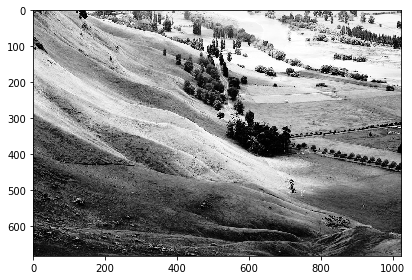

In [36]:
img = hist_equal(img)
imshow(img)
np.array_equal(img, img2)

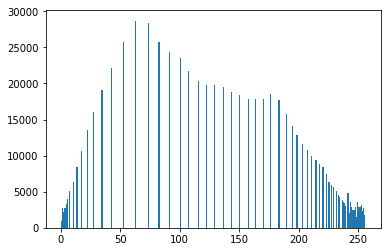

In [37]:
plt.hist(img.ravel(), bins=range(257))
plt.show()

In [41]:
#comparison
img = imread('https://stepik.org/media/attachments/lesson/60611/landscape.png')
img_autocntr = autocntr(img)
img_stable_autocntr = autocntr_func(img)
img_histequal = hist_equal(img)

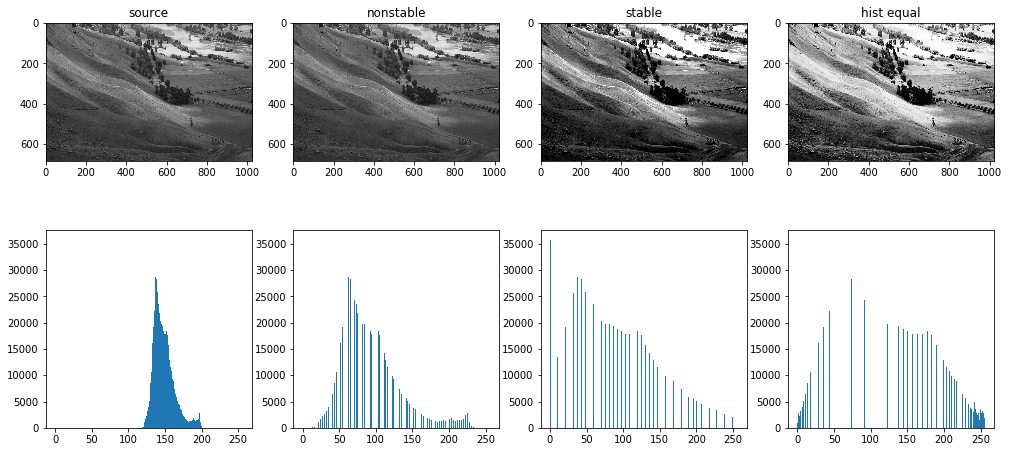

In [43]:
plt.figure(figsize=(17,8))
plt.set_cmap(cmap="gray")
plt.subplot(2,4,1)
plt.title("source")
plt.imshow(img)

plt.subplot(2,4,2)
plt.title("nonstable")
plt.imshow(img_autocntr)

plt.subplot(2,4,3)
plt.title("stable")
plt.imshow(img_stable_autocntr)

plt.subplot(2,4,4)
plt.title("hist equal")
plt.imshow(img_histequal)

ax5 = plt.subplot(2,4,5)
plt.hist(img.ravel(), bins=range(257))

ax6 = plt.subplot(2,4,6, sharey=ax5)
plt.hist(img_autocntr.ravel(), bins=range(257))

ax7 = plt.subplot(2,4,7, sharey=ax5)
plt.hist(img_stable_autocntr.ravel(), bins=range(257))

ax8 = plt.subplot(2,4,8, sharey=ax5)
plt.hist(img_histequal.ravel(), bins=range(257))

plt.show()